# Recap

### –í–µ–∫—Ç–æ—Ä–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è

#### –ß—Ç–æ –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –≤–µ–∫—Ç–æ—Ä–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è —Å–ª–æ–≤?

#### –ö–∞–∫ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –≤ —ç–º–±—ç–¥–¥–∏–Ω–≥–∏?

# [nn.Embeddings](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)

In [ ]:
# dict
word1 -> 0
word2 -> 1
word3 -> 3


–º–∞–º–∞ –º—ã–ª–∞ —Ä–∞–º—É -> [ 101 , 555, 1678 ] -> [ [ 0.1, 0.004... ], [ ...], [ ... ] ]

In [ ]:
(num_embeddings x emb_dim)[i, :]

In [ ]:
import torch
import torch.nn as nn
from string import ascii_lowercase

tokens_batch = torch.tensor([ 0, 1, 2 ])

nn_embeddings = nn.Embedding(num_embeddings=len(ascii_lowercase), embedding_dim=100)

tokens_batch_embedded = nn_embeddings(tokens_batch)
tokens_batch_embedded.shape

torch.Size([3, 100])

# RNN

### PyTorch –†–µ–∞–ª–∏–∑–∞—Ü–∏—è

In [7]:
import torch.nn as nn
import torch
?nn.RNN

In [6]:
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)

h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

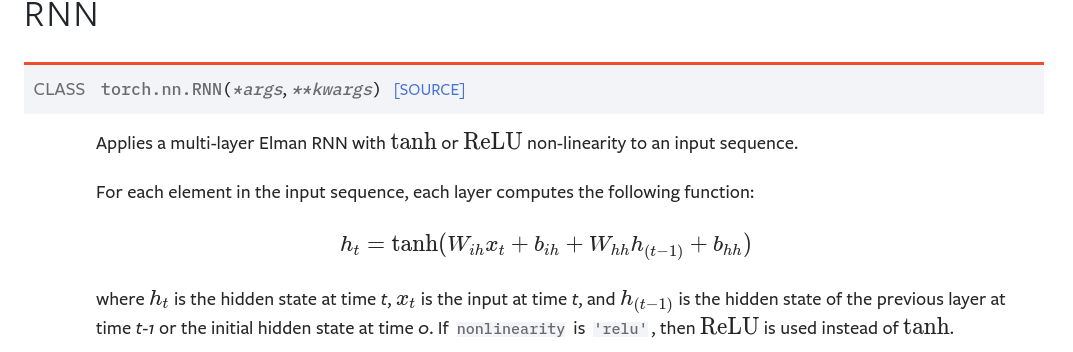

##### –ß—Ç–æ —Ç–∞–∫–æ–µ `output` –∏ `hn`?

In [ ]:
# seq_len, batch_size, hidden_dim
output.shape

torch.Size([5, 3, 20])

In [ ]:
# D * num_layers, batch_size, hidden_dim
# where D = 2 if bidirectional else 1
hn.shape

torch.Size([2, 3, 20])

In [ ]:
(output[-1, :, :] == hn[-1, :, :]).all()

tensor(True)

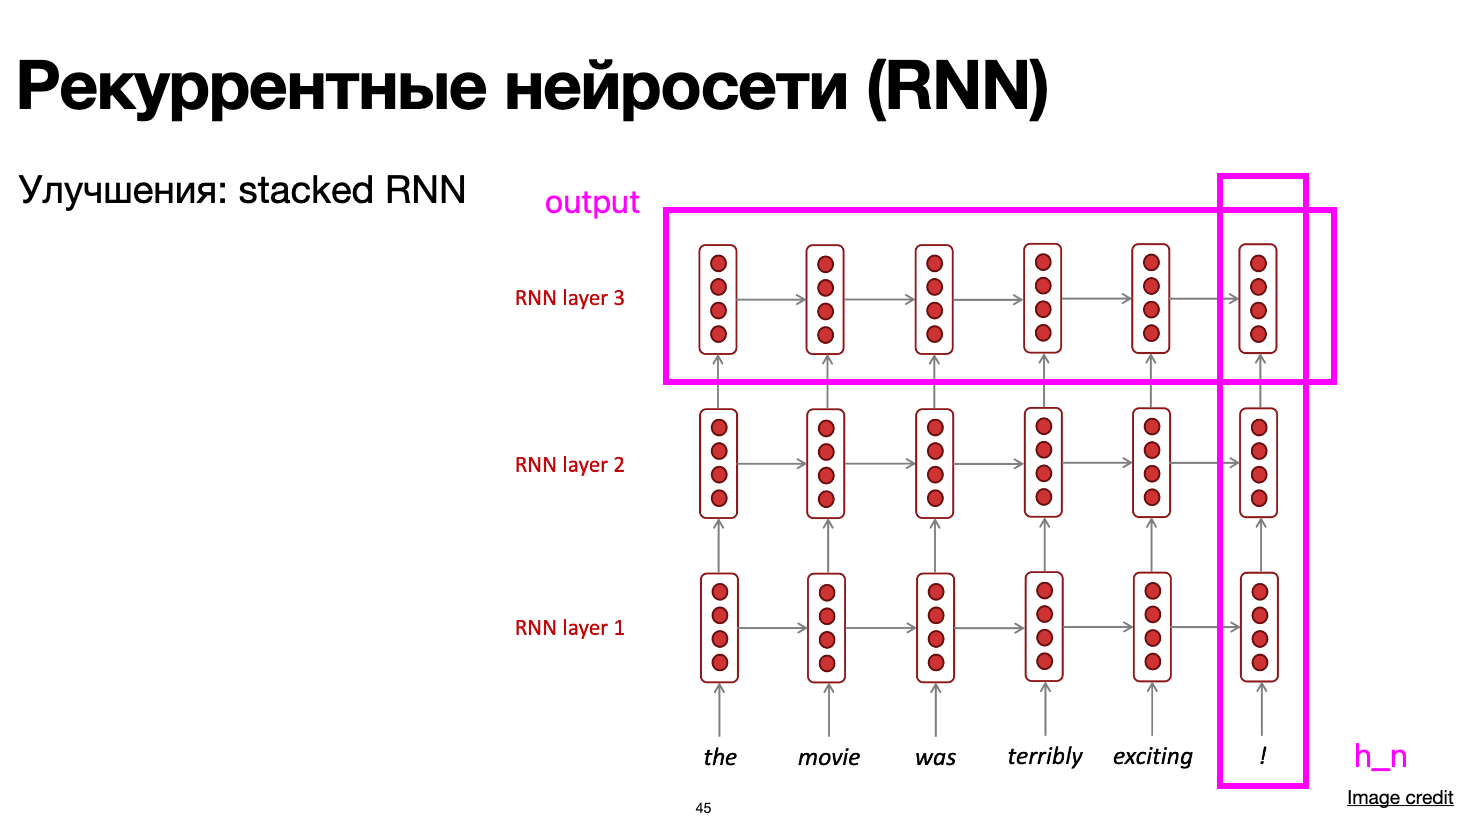

#### –ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –µ—Å—Ç—å –≤ RNN

In [3]:
# (W_ih W_hh, b_ih, b_hh) * 2

parameters_names = [ 'W_ih', 'W_hh', 'b_ih', 'b_hh' ] * 2
for name, p_shape in zip(parameters_names, list(map(lambda x: x.shape, rnn.parameters()))):
    print(name, ":", p_shape)

W_ih : torch.Size([20, 10])
W_hh : torch.Size([20, 20])
b_ih : torch.Size([20])
b_hh : torch.Size([20])
W_ih : torch.Size([20, 20])
W_hh : torch.Size([20, 20])
b_ih : torch.Size([20])
b_hh : torch.Size([20])


In [4]:
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_params(rnn)

1480

### –°–≤–æ—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è

In [ ]:
import torch.nn as nn

class MyRNN(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(MyRNN, self).__init__()

        assert num_layers == 1, "num_layers > 1 not implemented"

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)

    def forward(self, input, hidden):
        # input [ seq_len, batch_size, input_dim ]
        # hidden [ D * num_layers, hidden_dim ] # here always D * num_layers == 1

        output = []

        for i in range(input.shape[0]):
            output.append(hidden)

            # for n in self.n_layers
            #                      W_i2h + b_i2h          +  W_h2h + b_h2h
            hidden = torch.tanh( self.i2h(input[i, :, :]) + self.h2h(hidden) )

        output = torch.cat(output) # [ seq-len, bs, hid_dim, n layers ]

        return output, hidden

n_hidden = 128
n_letters = 26
n_categories = 10
rnn = MyRNN(n_letters, n_hidden, n_categories)

# [nn.LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM)

In [ ]:
lstm = nn.LSTM(10, 20, 2)

input = torch.randn(5, 3, 10)   # [ seq_len, batch_size, input_dim ]
h0 = torch.randn(2, 3, 20)      # [ num_layers * D, batch_size, hidden_dim ] # where D=2 if bidirectional else 1
c0 = torch.randn(2, 3, 20)      # shape like h0
output, (hn, cn) = lstm(input, (h0, c0))

In [ ]:
output.shape, hn.shape, cn.shape

(torch.Size([5, 3, 20]), torch.Size([2, 3, 20]), torch.Size([2, 3, 20]))

In [ ]:
(output[-1, :, :] == hn[-1, :, :]).all()

tensor(True)

In [ ]:
count_params(lstm)

5920

# [nn.GRU](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html#torch.nn.GRU)

In [ ]:
gru = nn.GRU(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = gru(input, h0)

In [ ]:
output.shape, hn.shape

(torch.Size([5, 3, 20]), torch.Size([2, 3, 20]))

In [ ]:
count_params(gru)

4440

**–í–æ–ø—Ä–æ—Å** –î–ª—è –∫–∞–∫–∏—Ö –∑–∞–¥–∞—á —Å–µ–π—á–∞—Å –≤–æ–∑–º–æ–∂–Ω–æ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å RNN?


```
–î–ª—è –Ω–µ –æ—á–µ–Ω—å –¥–ª–∏–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π, –≤ —É—Å–ª–æ–≤–∏—è—Ö –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã—Ö –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ—Å—É—Ä—Å–æ–≤
```


# Transformer

**Paper:**: [**Attention is all you need**](https://arxiv.org/abs/1706.03762)

## –°–µ–º–µ–π—Å—Ç–≤–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤

–í–æ–æ–±—â–µ –≥–æ–≤–æ—Ä—è, —Å–µ–º–µ–π—Å—Ç—Ä–æ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤ –¥–µ–ª–∏—Ç—Å—è –Ω–∞ 3 —Ç–∏–ø–∞:

- 1) **Encoder-Decoder Transformer** - –ú—ã —Å–µ–≥–æ–¥–Ω—è —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ç–æ–ª—å–∫–æ –µ–≥–æ. –ì–µ–Ω–µ—Ä–∞—Ç–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å. –° —ç—Ç–æ–π –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –Ω–∞—á–∞–ª–∞—Å—å —ç–ø–æ—Ö–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤.
- 2) **Encoder-Only Transformer** - BERT, RoBERTa. –ò—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –∫–∞–∫ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–∏–≤–Ω—ã–µ –º–æ–¥–µ–ª–∏.
- 3) **Decoder-Only Transformer** - GPT2, Llama. –°–µ–π—á–∞—Å —Å–∞–º–∞—è –ø–æ–ø—É–ª—è—Ä–Ω–∞—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤. –ì–µ–Ω–µ—Ä–∞—Ç–∏–≤–Ω–∞—è –º–æ–¥–µ–ª—å.


## Encoder-Decoder Transformer

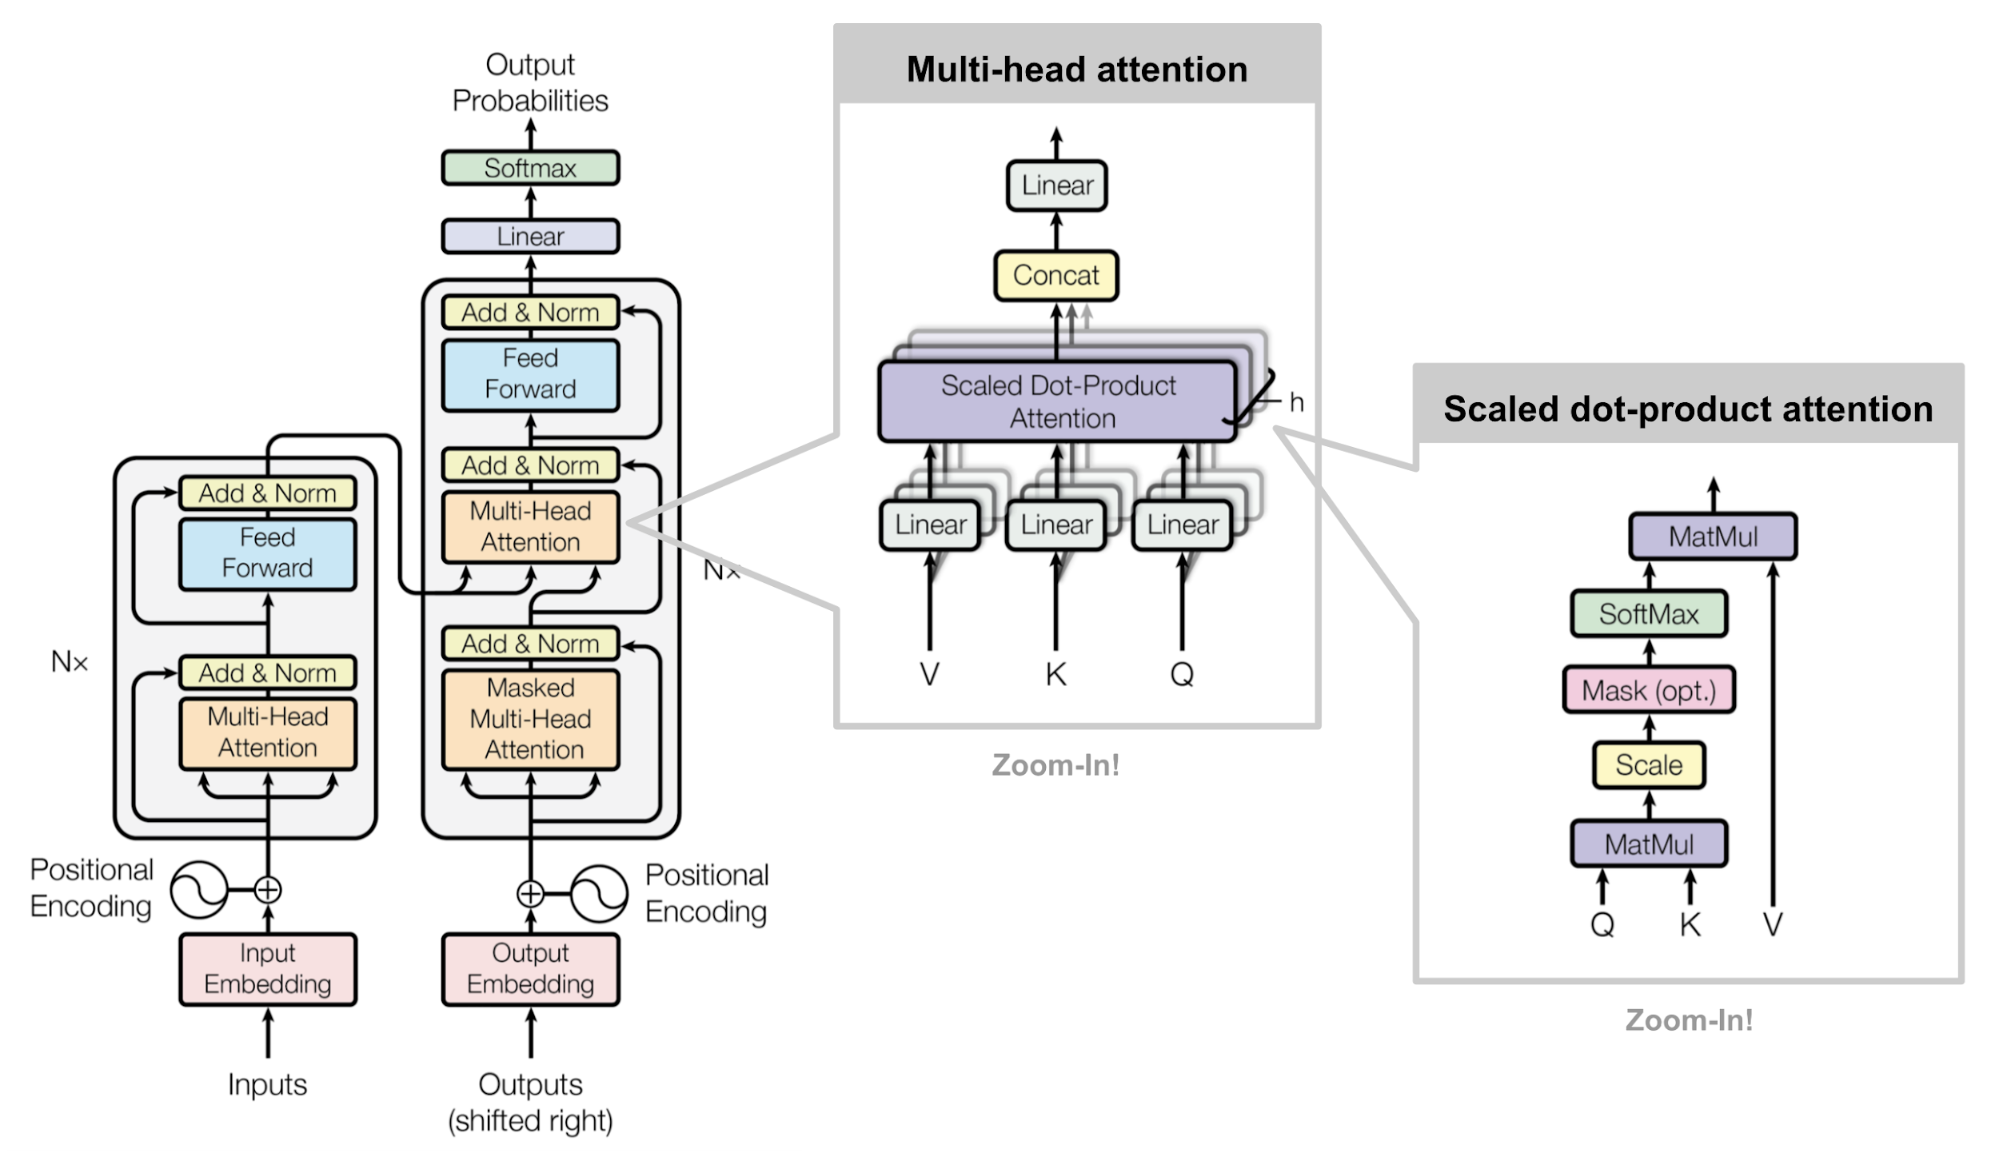

## Input Embeddings

In [ ]:
# 40M Params!
embeddings = nn.Embedding(50257, 768)

embeddings

## Attention

Compute attention weights and write the output context vector.
Keep in mind the formula of Attention function in transformers:

                                                                 
$$                                                                         
   \mathrm{Attention}(Q, K, V) = \mathrm{softmax}(\frac{QK^T}{\sqrt{d_k}})V               
$$     

In [ ]:
from torch.nn.functional import softmax
import torch
import torch.nn as nn
import math

#                          Embeddings
def self_attention_function(x, w_query, w_key, w_value):

    q = x @ w_query     # [ bs, seq_len, query_dim ]
    k = x @ w_key       # [ bs, seq_len, key_dim ]
    v = x @ w_value     # [ bs, seq_len, value_dim ]

    qkt = (q @ k.T)     # [ bs, seq_len, seq_len ]
    qk_scaled = softmax(qkt / math.sqrt(k.size(1)), dim=-1) # [ bs, seq_len, seq_len ]
    context_vector = qk_scaled @ v # [ bs, seq_len, value_dim ]

    return context_vector


–ß–∞—â–µ –≤—Å–µ–≥–æ `{q,k,v}_dim`  –≤—ã–±–∏—Ä–∞—é—Ç  –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏

In [ ]:
# cross attention
#                       D      E    E
def attention_function( query, key, value, w_key, w_query, w_value):

    assert (key == value).all()

    q = query @ w_query     # [ bs, q_seq_len, attn_dim ]
    k = key   @ w_key       # [ bs, kv_seq_len, attn_dim ]
    v = value @ w_value     # [ bs, kv_seq_len, attn_dim ]

    qkt = (q @ k.T)     # [ bs, q_seq_len, kv_seq_len ]
    qk_scaled = softmax(qkt / math.sqrt(k.size(1)), dim=-1) # [ bs, q_seq_len, kv_seq_len ]

    # –∫–∞–∫ —Ç—É—Ç –ø–µ—Ä–µ–º–Ω–æ–∂–∞—é—Ç—Å—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏? –∫–∞–∫–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏?
    context_vector = qk_scaled @ v # [ bs, q_seq_len, value_dim ]

    return context_vector


In [ ]:

encoder_embeddings = ... # mytransformer.encode( sequence_embeddings )
decoder_embeddings = ... # mytransformer.decoder.self_attention( target_embeddings )

q, k, v = decoder_embeddings, encoder_embeddings, encoder_embeddings

attention_function( q, k, v , w_key, w_query, w_value)


#### Masked Attention

##### Why?
* decoder lookahead


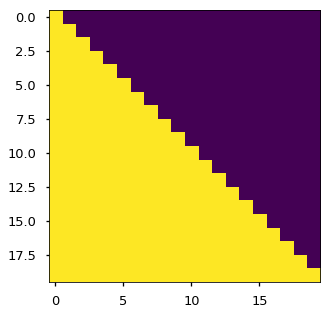

In [ ]:
def attention_function( query, key, value, w_key, w_query, w_value, mask=None):

    q = query @ w_query     # [ bs, q_seq_len, query_dim ]
    k = key   @ w_key       # [ bs, k_seq_len, key_dim ]
    v = value @ w_value     # [ bs, v_seq_len, value_dim ]

    qkt = (q @ k.T)     # [ bs, q_seq_len, k_seq_len ]
    qk_scaled = softmax(qkt / math.sqrt(k.size(1)), dim=-1) # [ bs, q_seq_len, k_seq_len ]

    if mask is not None:
        qk_scaled = qk_scaled.masked_fill(mask == 0, 0)

    context_vector = qk_scaled @ v # [ bs, (src|tgt)_seq_len, value_dim ]

    return context_vector


## MultiHeadAttention

–û–¥–Ω–∞ –≥–æ–ª–æ–≤–∞ —Ö–æ—Ä–æ—à–æ, –∞ 8 –ª—É—á—à–µ, –∏–¥–µ—è –∫–∞–∫ –ø—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–≤–∞ —è–¥–µ—Ä —Å–≤–µ—Ä—Ç–∫–∏ –≤ `Conv2d`



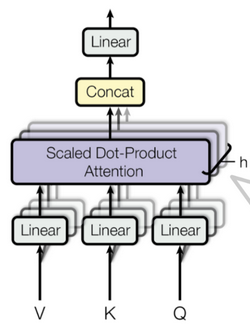

## Attention visualization



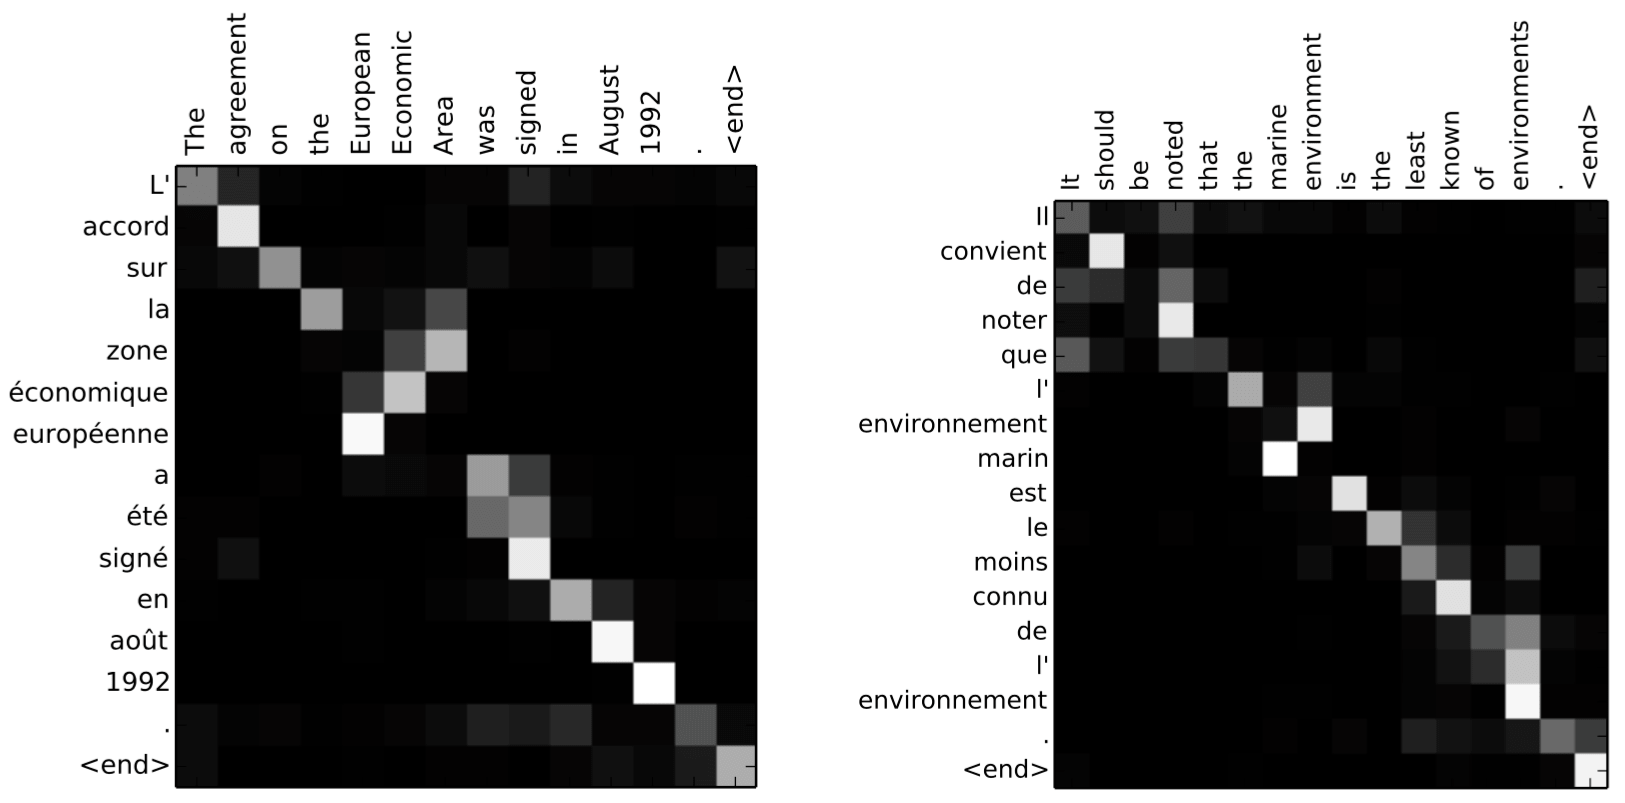

## [Transformer Encoder](https://pytorch.org/docs/master/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder)

In [ ]:
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(10, 32, 512)
out = transformer_encoder(src)

encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
  )
  (linear1): Linear(in_features=512, out_features=2048, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=2048, out_features=512, bias=True)
  (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [ ]:
count_params(encoder_layer) # 3M

3152384

## [Transformer Decoder](https://pytorch.org/docs/stable/generated/torch.nn.TransformerDecoder.html)

In [ ]:
decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
memory = torch.rand(10, 32, 512) # encoder hidden state
tgt = torch.rand(20, 32, 512)
out = transformer_decoder(tgt, memory)

decoder_layer

TransformerDecoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
  )
  (multihead_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
  )
  (linear1): Linear(in_features=512, out_features=2048, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=2048, out_features=512, bias=True)
  (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (norm3): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (dropout3): Dropout(p=0.1, inplace=False)
)

In [ ]:
count_params(decoder_layer) # 4M

## [Transofrmer](https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html)

In [ ]:
import torch
import torch.nn as nn
transformer_model = nn.Transformer(nhead=8, num_encoder_layers=6, num_decoder_layers=6)
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
out = transformer_model(src, tgt)

transformer_model

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, o

In [ ]:
# –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä 6 –±–ª–æ–∫–æ–≤, –≤—Å–µ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–±–µ–∑ —ç–º–±—ç–¥–¥–∏–Ω–≥–æ–≤) = 44M
count_params( nn.Transformer(nhead=8, num_encoder_layers=6, num_decoder_layers=6) )

44140544

In [ ]:
# —Å–∫–æ–ª—å–∫–æ –≤—Å–µ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ –º–µ—Ö–∞–Ω–∏–∑–º–µ –≤–Ω–∏–º–∞–Ω–∏—è –≤ –º–æ–¥–µ–ª–∏?
# 1M * (num_encoders + 2 * num_decoders)
count_params( transformer_model.decoder.layers[0].multihead_attn )

1050624

# Positional Embeddings

## Learned Positional Embeddings

* ‚úîÔ∏è –û—á–µ–Ω—å –ø—Ä–æ—Å—Ç–æ–π –ø–æ–¥—Ö–æ–¥
* ‚ùå –ù–µ –º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –ø–æ–∑–∏—Ü–∏—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª–∏ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ


## Positional Embeddings

–í –º–µ—Ö–∞–Ω–∏–∑–º–µ –≤–Ω–∏–º–∞–Ω–∏—è –Ω–µ—Ç –Ω–∏–∫–∞–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø–æ–∑–∏—Ü–∏—è—Ö —Ä–∞–∑–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤.

–í –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–π —Å—Ç–∞—Ç—å–µ –±—ã–ª–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∞ –¥–µ—Ç–µ—Ä–º–µ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —Ñ-—è.

* ‚úîÔ∏è –ú–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –ø–æ–∑–∏—Ü–∏—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª–∏ –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
* ‚ùå –î–µ–ª–∞–µ—Ç —ç—Ç–æ –ø–ª–æ—Ö–æ


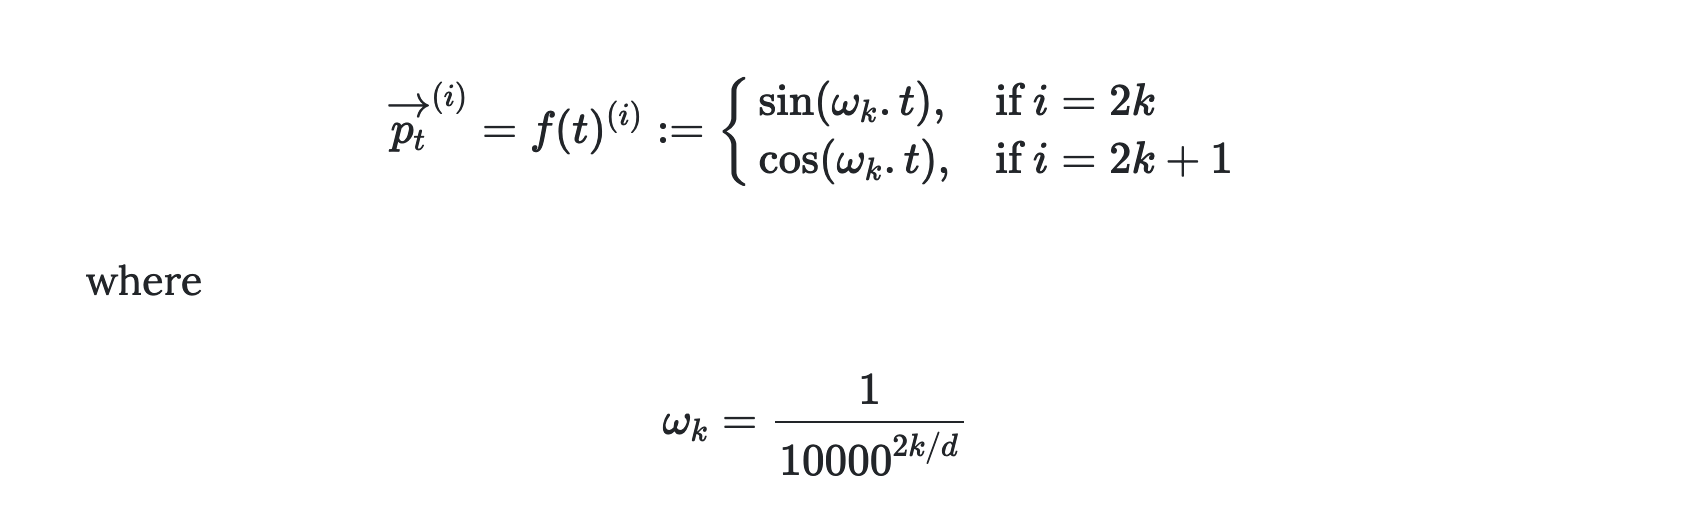

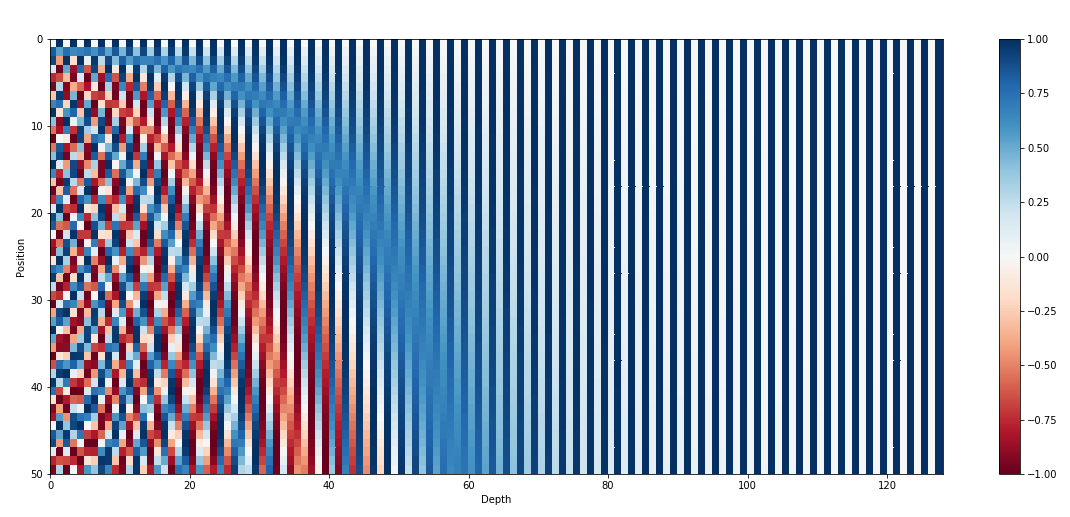

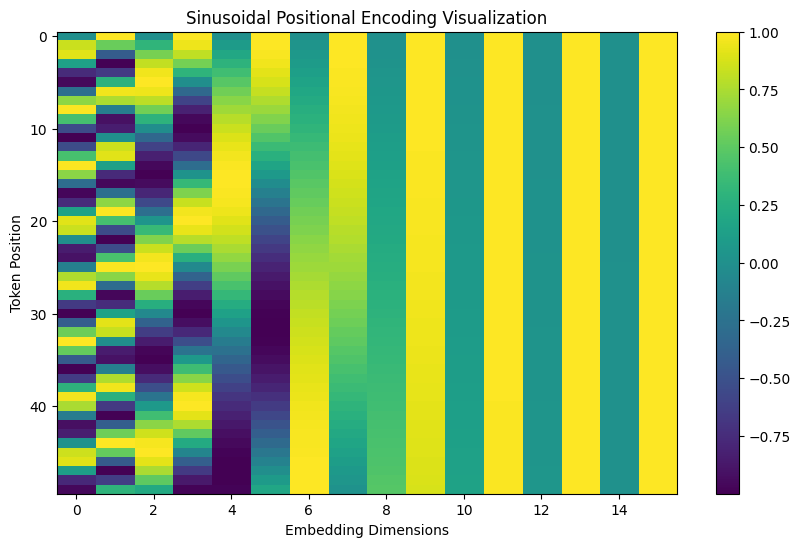

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_sinusoidal_positional_encoding(seq_len, d_model):
    """Generate sinusoidal positional encoding."""
    position = np.arange(seq_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))

    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)

    return torch.tensor(pe, dtype=torch.float32)

# Define sequence length and model dimension
seq_len = 50   # Number of positions (e.g., words in a sentence)
d_model = 16   # Embedding size (must be even)

# Get positional encoding
pos_encoding = get_sinusoidal_positional_encoding(seq_len, d_model)

# Plot positional encodings for visualization
plt.figure(figsize=(10, 6))
plt.imshow(pos_encoding.numpy(), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Sinusoidal Positional Encoding Visualization")
plt.xlabel("Embedding Dimensions")
plt.ylabel("Token Position")
plt.show()

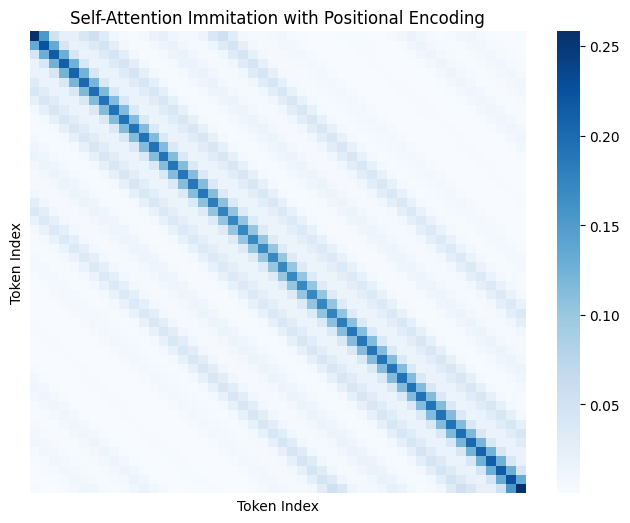

In [6]:
seq_len = 50

encoded_tokens = pos_encoding[:seq_len, :]

# Simulate self-attention scores using dot product of encoded tokens
attention_scores = torch.matmul(encoded_tokens, encoded_tokens.T)

# Normalize attention scores
attention_scores = torch.nn.functional.softmax(attention_scores, dim=-1)

# Visualize attention scores
plt.figure(figsize=(8, 6))
sns.heatmap(attention_scores.numpy(), cmap="Blues", xticklabels=False, yticklabels=False)
plt.title("Self-Attention Immitation with Positional Encoding")
plt.xlabel("Token Index")
plt.ylabel("Token Index")
plt.show()


## RoPE - Rotary Positional Embeddings

* ‚úîÔ∏è –ü—Ä–∏–º–µ–Ω—è—é—Ç—Å—è –≤ –º–æ–¥—É–ª–µ –º–µ—Ö–∞–Ω–∏–∑–º–∞ –≤–Ω–∏–º–∞–Ω–∏—è **–Ω–∞ –∫–∞–∂–¥–æ–º —Å–ª–æ–µ**
* ‚úîÔ∏è –ú–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –±–æ–ª–µ–µ –¥–ª–∏–Ω–Ω—ã–º–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—è–º–∏ ([YaRN](https://arxiv.org/abs/2309.00071))
* ‚úîÔ∏è –ü—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω—ã–π –±–µ–π–∑–ª–∞–π–Ω –¥–ª—è –≤—ã–±–æ—Ä–∞ –ø–æ–∑–∏—Ü–∏–æ–Ω–Ω—ã—Ö —ç–º–±—ç–¥–¥–∏–Ω–≥–æ–≤


[**Annotated RoPE**](https://nn.labml.ai/transformers/rope/index.html)


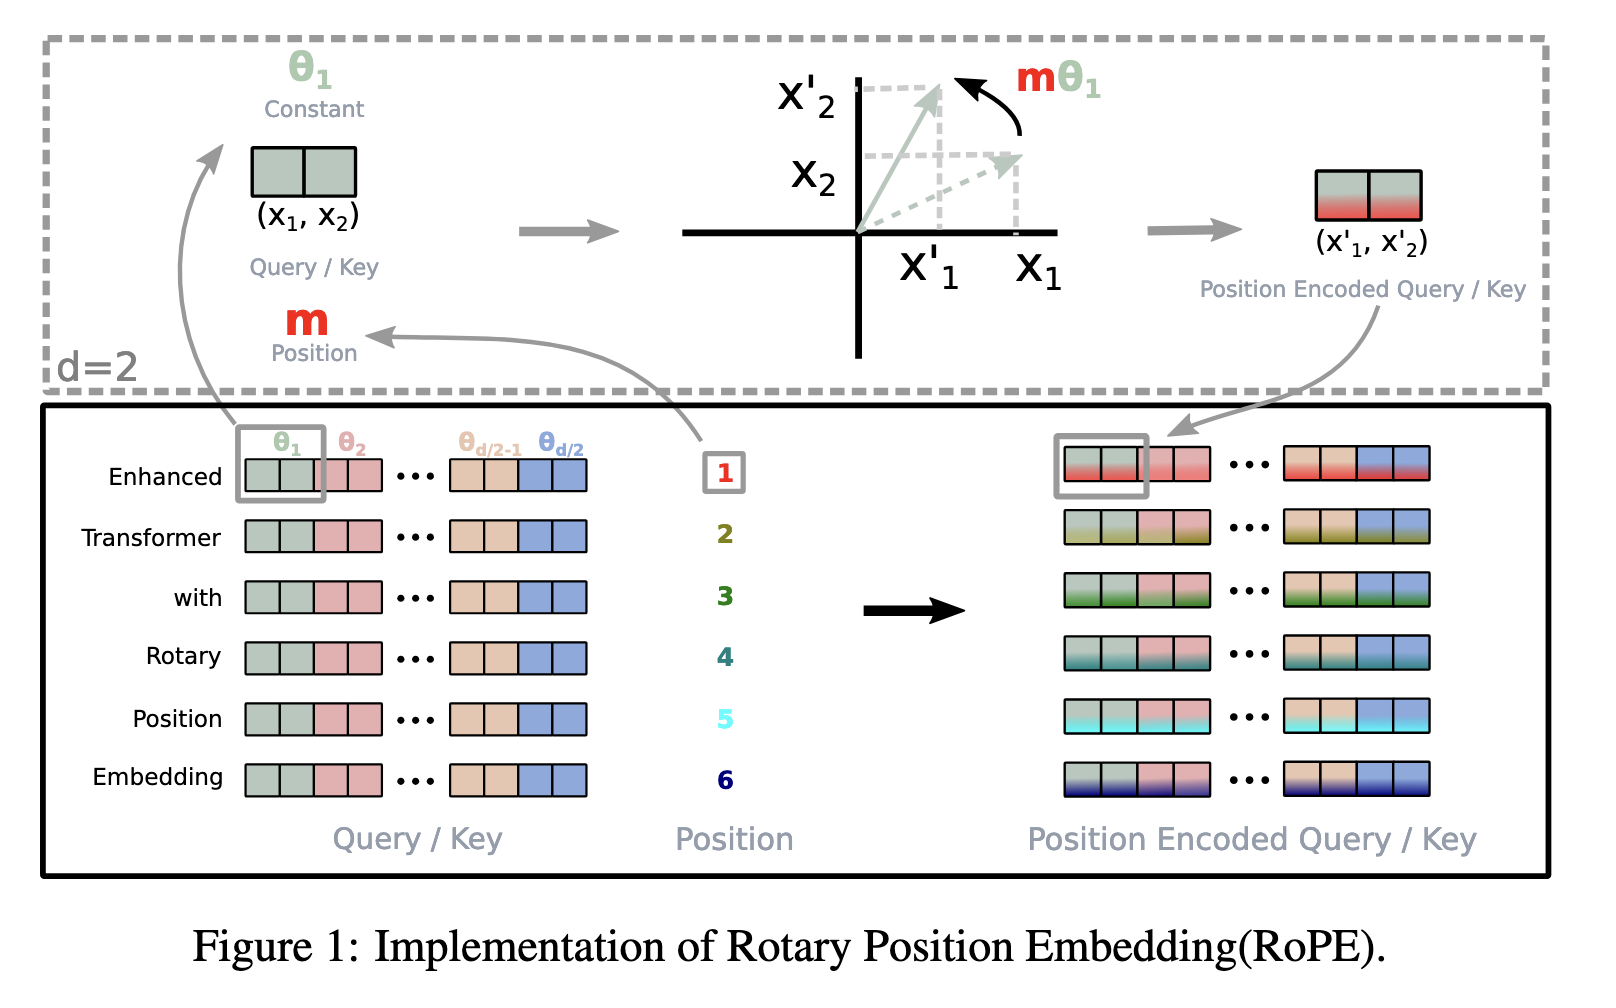

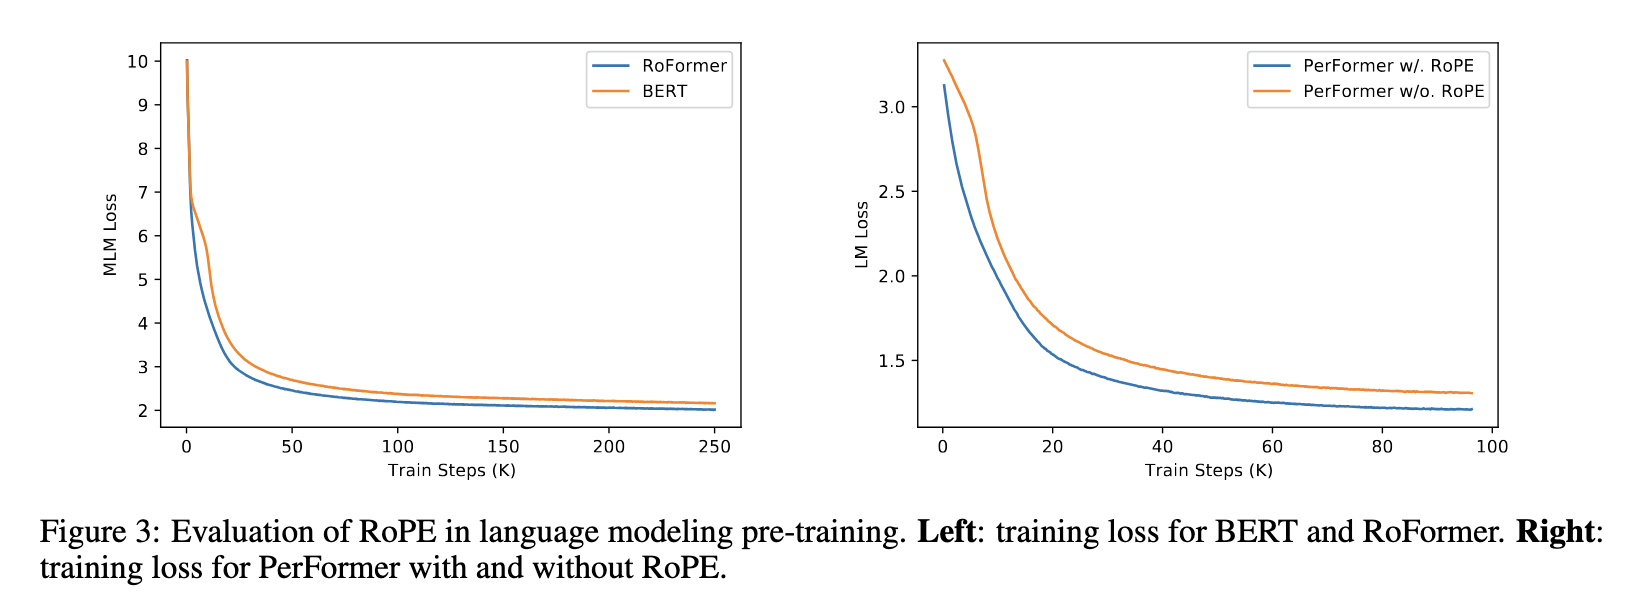

Original Token Embeddings Shape: torch.Size([50, 64])


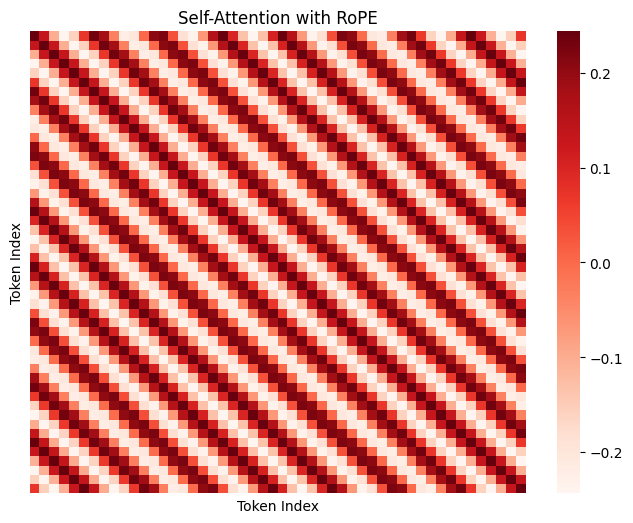

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def apply_rope(q, k):
    """Apply Rotary Positional Embeddings (RoPE) to query and key vectors."""
    seq_len, d_model = q.shape
    theta = 10_000 ** (-torch.arange(0, d_model, 2).float() / d_model)

    position = torch.arange(seq_len).float().unsqueeze(1)
    theta = position * theta.unsqueeze(0)

    sin_theta = torch.sin(theta)
    cos_theta = torch.cos(theta)

    q1, q2 = q[..., 0::2], q[..., 1::2]
    k1, k2 = k[..., 0::2], k[..., 1::2]

    q_rotated = torch.cat([q1 * cos_theta - q2 * sin_theta, q1 * sin_theta + q2 * cos_theta], dim=-1)
    k_rotated = torch.cat([k1 * cos_theta - k2 * sin_theta, k1 * sin_theta + k2 * cos_theta], dim=-1)

    return q_rotated, k_rotated

# Define sequence length and model dimension
seq_len = 50   # Number of positions (e.g., words in a sentence)
d_model = 64    # Embedding size (must be even)

# Simulate token embeddings (random values)
token_embeddings = torch.randn(seq_len, d_model)

print("Original Token Embeddings Shape:", token_embeddings.shape)

# Apply RoPE and visualize
q = torch.rand(1, d_model)
q = q.repeat(seq_len, 1)
k = q.clone()

q = q[:, :2]
k = k[:, :2]

attention_scores = torch.matmul(q, k.T)
q_rotated, k_rotated = apply_rope(q, k)

q_rotated = q_rotated[:, :2]
k_rotated = k_rotated[:, :2]

rope_attention_scores = torch.matmul(q_rotated, k_rotated.T)

# Visualize RoPE attention scores
plt.figure(figsize=(8, 6))
sns.heatmap(rope_attention_scores.numpy(), cmap="Reds", xticklabels=False, yticklabels=False)
plt.title("Self-Attention with RoPE")
plt.xlabel("Token Index")
plt.ylabel("Token Index")
plt.show()


# Efficient Attention


## Complexity

### Dimensions:

$$ \text{Attention}(\underset{\mathbb{R}^{n \times d_k}}{Q}, \underset{\mathbb{R}^{n \times d_k}}{K}, \underset{\mathbb{R}^{n \times d_v}}{V}) = \underset{\mathbb{R}^{n \times n}}{\text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)} \underset{\mathbb{R}^{n \times d_v}}{V}
$$


–í–æ–∑–º–æ–∂–Ω—ã–µ —Ä–µ—à–µ–Ω–∏—è:

1. **–ò–Ω–∂–µ–Ω–µ—Ä–Ω—ã–µ —Ç—Ä—é–∫–∏** - [FlashAttention](https://github.com/Dao-AILab/flash-attention/), [HIP Attention](https://github.com/DeepAuto-AI/hip-attention/), [FlashMLA](https://github.com/deepseek-ai/FlashMLA)

1. **–†–∞–∑—Ä–µ–∂–µ–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –≤–Ω–∏–º–∞–Ω–∏—è** - [BigBird](https://arxiv.org/abs/2007.14062), [Longformer](https://arxiv.org/pdf/2004.05150)

2. **–õ–∏–Ω–µ–π–Ω—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤–Ω–∏–º–∞–Ω–∏—è** - [Performer](https://arxiv.org/abs/2009.14794), [Linformer](https://arxiv.org/abs/2006.04768)



## [FlashAttention](https://github.com/Dao-AILab/flash-attention)

–ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ —Ñ–∞–∫—Ç—ã:

* [–í–∫–ª—é—á–µ–Ω–æ](https://pytorch.org/blog/pytorch2-2/) –≤ —è–¥—Ä–æ Pytorch –∏–∑ –∫–æ—Ä–æ–±–∫–∏ - [**scaled_dot_product_attention**](https://pytorch.org/docs/2.2/generated/torch.nn.functional.scaled_dot_product_attention.html)
* –ü–∏–ª–∏—Ç –æ–¥–∏–Ω —á–µ–ª–æ–≤–µ–∫, –ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤—Å—è –∏–Ω–¥—É—Å—Ç—Ä–∏—è

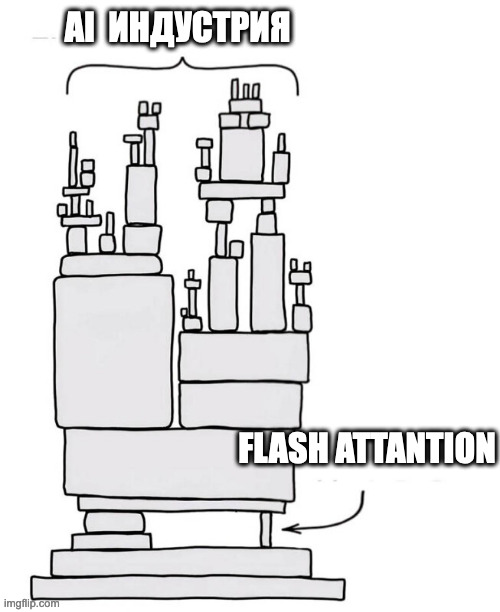


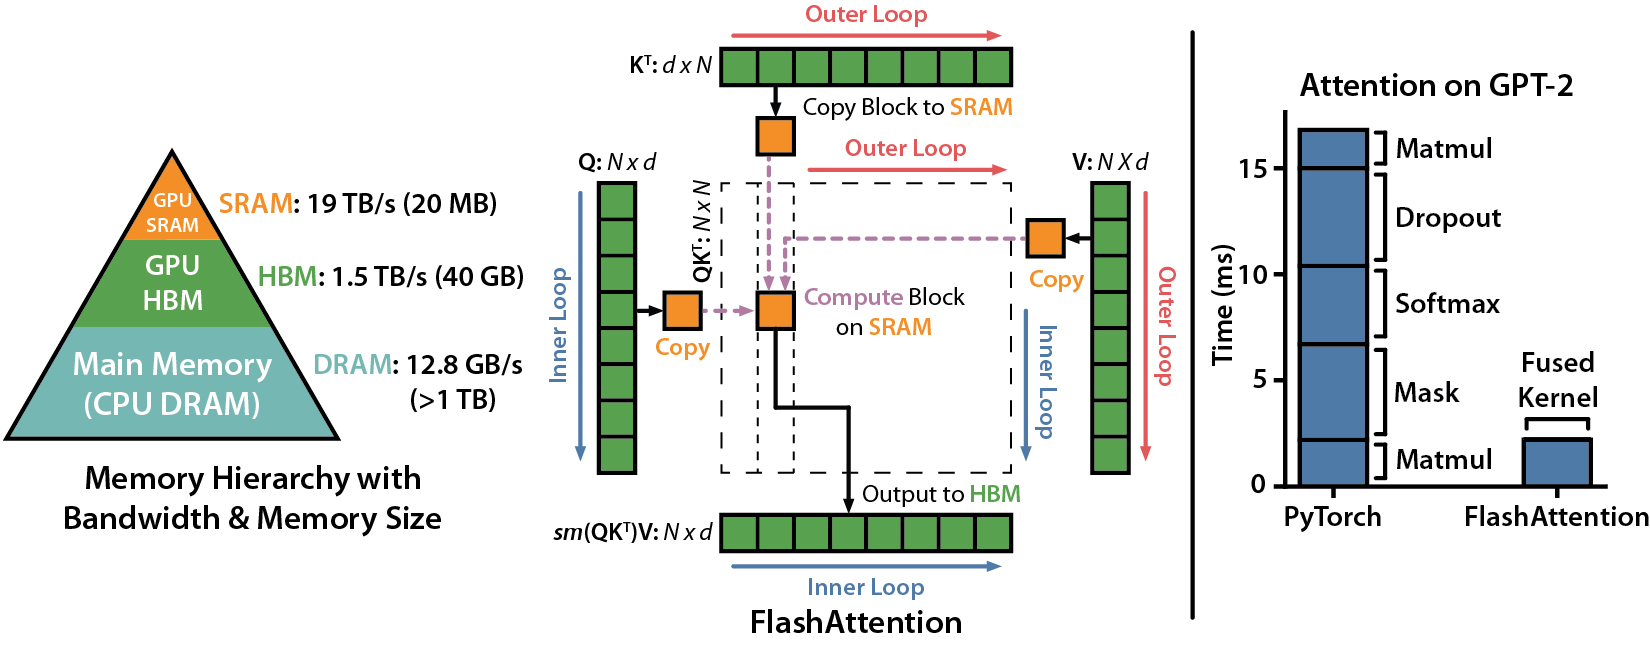

## –°—Ä–∞–≤–Ω–µ–Ω–∏–µ

**–ò–¥–µ—è:** –ó–∞ —Å—á–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π —Ä–∞–±–æ—Ç—ã —Å –ø–∞–º—è—Ç—å—é, –º–æ–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π, –Ω–æ —Å—ç–∫–æ–Ω–æ–º–∏—Ç—å –æ–±—â–µ–µ –≤—Ä–µ–º—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è, —Ç–∞–∫ –∫–∞–∫ —á–∞—Å—Ç–æ —É–∑–∫–æ–µ –º–µ—Å—Ç–æ -- —ç—Ç–æ –∏–º–µ–Ω–Ω–æ –∑–∞–≥—Ä—É–∑–∫–∞/–∑–∞–ø–∏—Å—å –≤ –ø–∞–º—è—Ç—å.


## EagerAttention

**–¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å:** $ O(N^2) $

**–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞—è –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å:** $ O(N^2) $

**–°–ª–æ–∂–Ω–æ—Å—Ç—å –ø–æ –ø–∞–º—è—Ç–∏:** $ O(N^2) $

## FlashAttention

**–¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å:** $ O(N^2) $

**–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞—è –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å:** $ O(N) $ ‚úÖ

**–°–ª–æ–∂–Ω–æ—Å—Ç—å –ø–æ –ø–∞–º—è—Ç–∏:** $ O(N) $ ‚úÖ

## [BigBird](https://arxiv.org/abs/2007.14062) (transformer-encoder)

**–ò–¥–µ—è:** –ú–æ–¥–∏—Ñ–∏—Ü–∏—Ä—É–µ–º –º–∞—Å–∫—É –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤–Ω–∏–º–∞–Ω–∏—è.

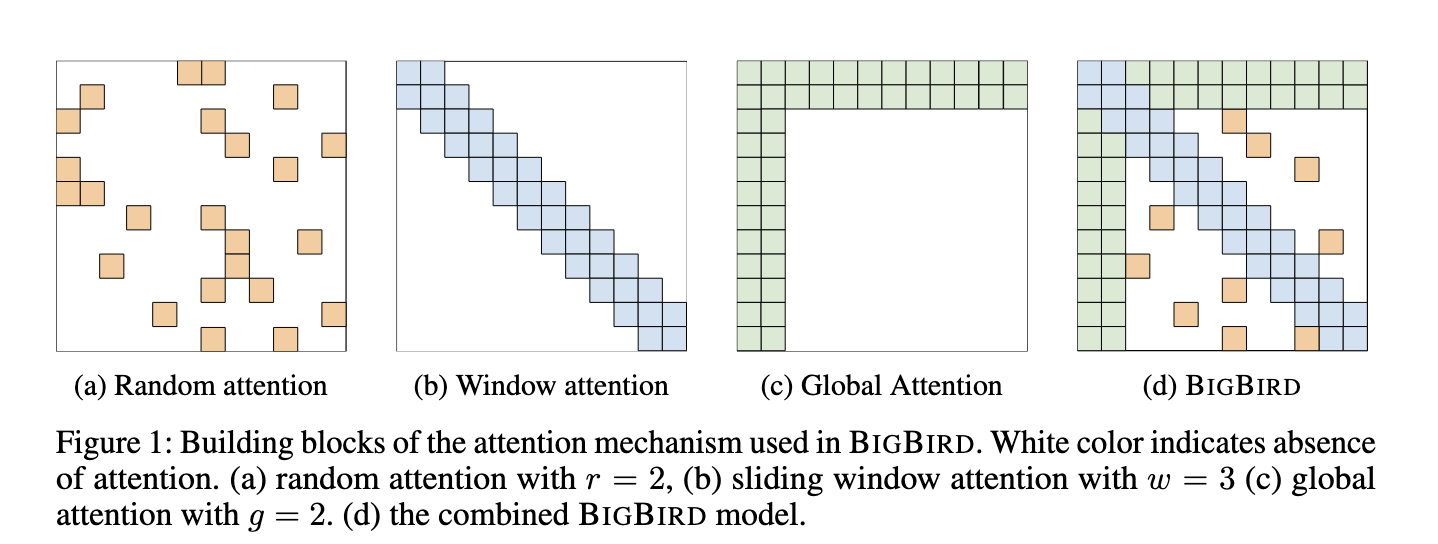

## Linformer

**–ò–¥–µ—è:** –ú–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å "—Ç—Ä—é–∫" –≤ –≤—ã—á–∏—Å–ª–µ–Ω–∏–∏ –º–∞—Ç—Ä–∏—Ü—ã –≤–Ω–∏–º–∞–Ω–∏—è $Q$, $K$ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —É–º–µ–Ω—å—à–∏—Ç—å –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—É—é —Å–ª–æ–∂–Ω–æ—Å—Ç—å –≤–Ω–∏–º–∞–Ω–∏—è.



## –°–ª–æ–∂–Ω–æ—Å—Ç—å –º–∞—Ç—Ä–∏—á–Ω–æ–≥–æ —É–º–Ω–æ–∂–µ–Ω–∏—è:

### Eager Attention

$d$ - —Å–∫—Ä—ã—Ç–∞—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å

$N$ - —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–ª–∏–Ω–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏

$$ Q_{N \times d} \cdot  K_{N \times d}^T = Attention_{N \times N} $$

$$ Q_{N \times d} \cdot  K_{d \times N} = Attention_{N \times N} $$


–í—ã—á–∏—Å–ª–∏—Ç–∞–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å $ O( N \times N \times d ) = $ O( N^2 ) $ $


### Linformer Attention

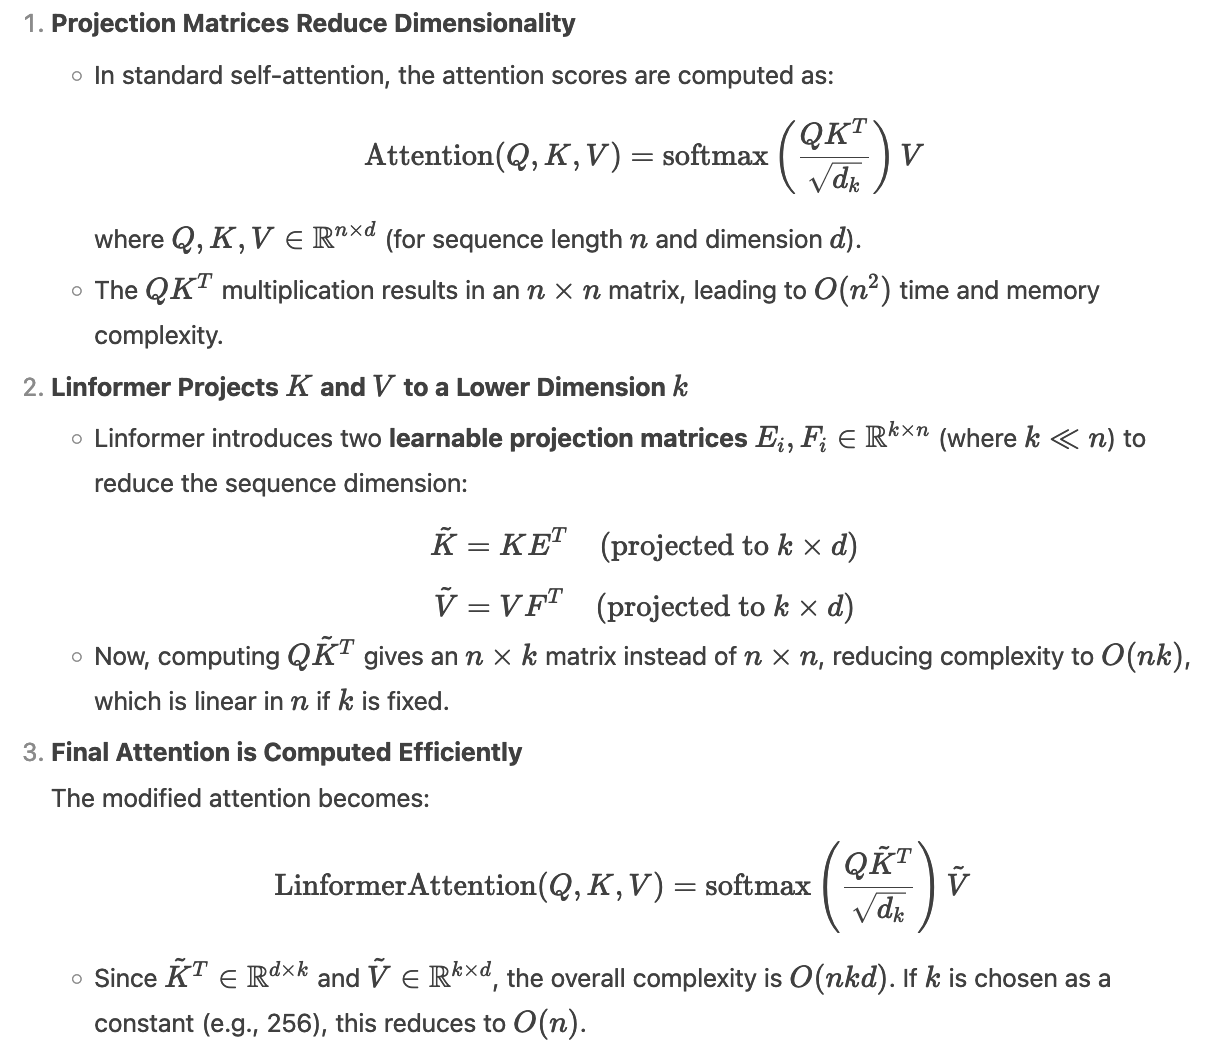


---

# [RNN + Transformer = RMT (Recurrent Memory Transformer)](https://arxiv.org/abs/2207.06881)

[Github](https://github.com/booydar/LM-RMT)

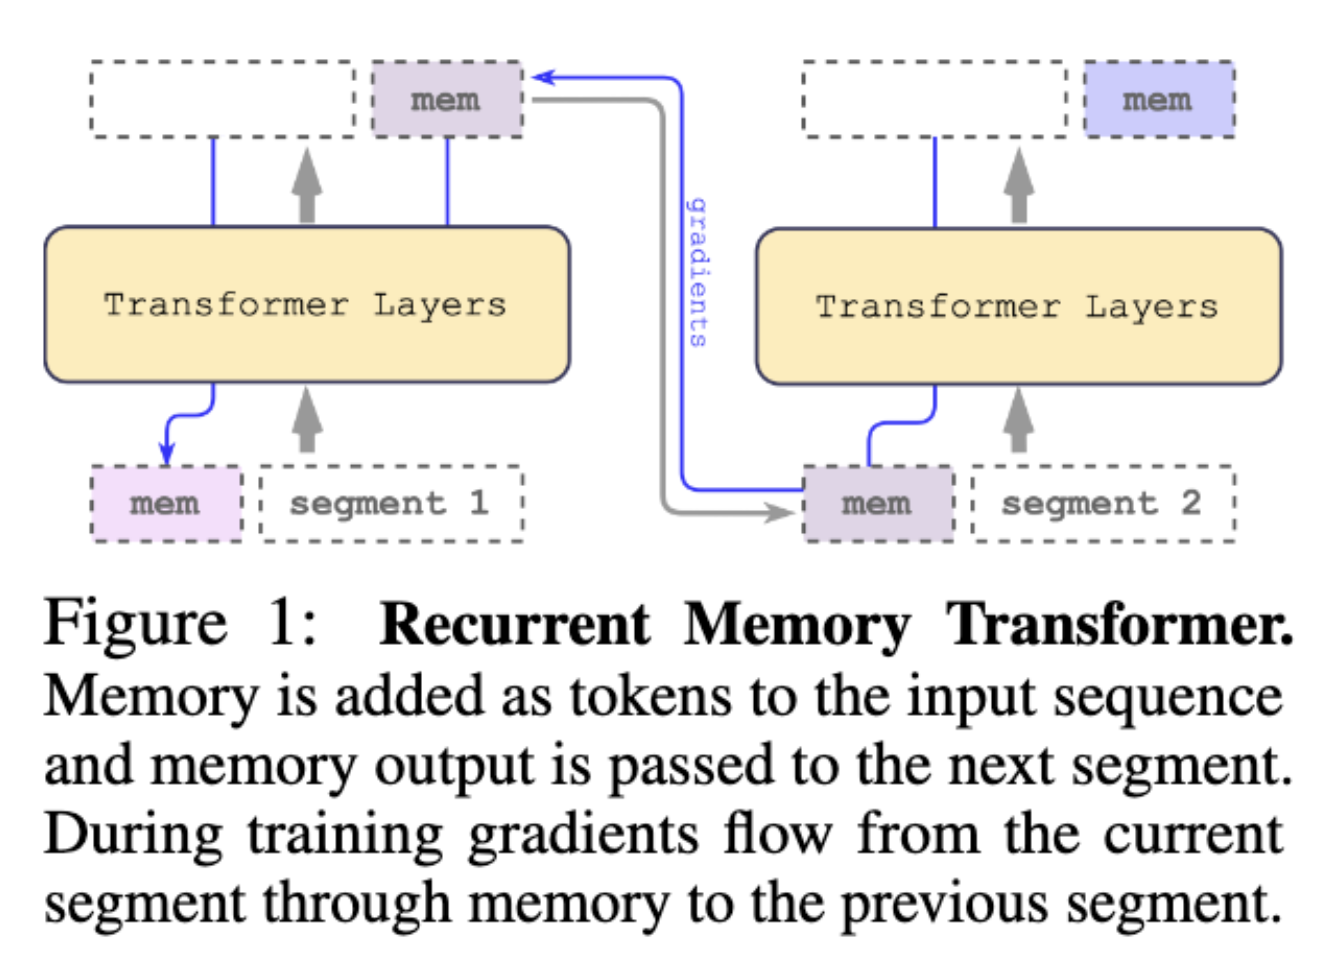


---

# [HuggingFace](https://huggingface.co/)

* [quicktour](https://huggingface.co/docs/transformers/quicktour)
* [training](https://huggingface.co/docs/transformers/training)

## Pipeline


In [ ]:
!pip install -q transformers

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
classifier.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
classifier("We are very happy to show you the ü§ó Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

## Auto* Classes

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

PreTrainedTokenizerFast(name_or_path='nlptown/bert-base-multilingual-uncased-sentiment', vocab_size=105879, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [ ]:
classifier("Nous sommes tr√®s heureux de vous pr√©senter la biblioth√®que ü§ó Transformers.")


[{'label': '5 stars', 'score': 0.7272651791572571}]

## Training (Finetuning)

In [ ]:
!pip install -q datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")
dataset["train"][100]


Reusing dataset yelp_review_full (/root/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/13c31a618ba62568ec8572a222a283dfc29a6517776a3ac5945fb508877dde43)


  0%|          | 0/2 [00:00<?, ?it/s]

{'label': 0,
 'text': 'My expectations for McDonalds are t rarely high. But for one to still fail so spectacularly...that takes something special!\\nThe cashier took my friends\'s order, then promptly ignored me. I had to force myself in front of a cashier who opened his register to wait on the person BEHIND me. I waited over five minutes for a gigantic order that included precisely one kid\'s meal. After watching two people who ordered after me be handed their food, I asked where mine was. The manager started yelling at the cashiers for \\"serving off their orders\\" when they didn\'t have their food. But neither cashier was anywhere near those controls, and the manager was the one serving food to customers and clearing the boards.\\nThe manager was rude when giving me my order. She didn\'t make sure that I had everything ON MY RECEIPT, and never even had the decency to apologize that I felt I was getting poor service.\\nI\'ve eaten at various McDonalds restaurants for over 30 years. 

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = dataset.map(tokenize_function, batched=True)

Loading cached processed dataset at /root/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/13c31a618ba62568ec8572a222a283dfc29a6517776a3ac5945fb508877dde43/cache-a9ff008ff2e851c3.arrow


  0%|          | 0/50 [00:00<?, ?ba/s]

In [ ]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
)


In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 375


KeyboardInterrupt: ignored

# [FairSeq](https://github.com/pytorch/fairseq)

–ï—Å–ª–∏ –Ω–∞–¥–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —É–∂–µ –≥–æ—Ç–æ–≤—ã–µ –º–æ–¥–µ–ª—å–∫–∏ –∏–ª–∏ –µ—Å—Ç—å –∏–¥–µ–∏, –∫–∞–∫ –∏—Ö –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å


```
fairseq-train \
    data-bin/wmt14_en_de_distill \
    --save-dir checkpoints \
    --ddp-backend=legacy_ddp \
    --task translation_lev \
    --criterion nat_loss \
    --arch levenshtein_transformer \
    --noise random_delete \
    --share-all-embeddings \
    --optimizer adam --adam-betas '(0.9,0.98)' \
    --lr 0.0005 --lr-scheduler inverse_sqrt \
    --stop-min-lr '1e-09' --warmup-updates 10000 \
    --warmup-init-lr '1e-07' --label-smoothing 0.1 \
    --dropout 0.3 --weight-decay 0.01 \
    --decoder-learned-pos \
    --encoder-learned-pos \
    --apply-bert-init \
    --log-format 'simple' --log-interval 100 \
    --fixed-validation-seed 7 \
    --max-tokens 8000 \
    --save-interval-updates 10000 \
    --max-update 300000
```

# –ï—â–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã

### –ú–∞—Ç–µ—Ä–∏–∞–ª—ã –ø–æ RNN

##### –ó–∞–¥–∞—á–∞ POS-tagging

##### **–í–æ–ø—Ä–æ—Å**: —á–µ–º LSTM/RNN –ª—É—á—à–µ/—Ö—É–∂–µ –¥–ª—è –∑–∞–¥–∞—á–∏ POS-tagging'–∞, —á–µ–º MLP –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä?


#### –í –æ—Ç–¥–µ–ª—å–Ω–æ–º [**–Ω–æ—É—Ç–±—É–∫–µ**](https://colab.research.google.com/drive/1DMydkEt3mg8MagsMoitWHDUUWcjRa9Cd?usp=sharing)


–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π [—Ç—É—Ç–æ—Ä–∏–∞–ª](https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html)



* [Memorization in RNNs](https://distill.pub/2019/memorization-in-rnns/)
* [Illustrated Guide to LSTM‚Äôs and GRU‚Äôs: A step by step explanation](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

### –ú–∞—Ç–µ—Ä–∏–∞–ª—ã –ø–æ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞–º

–ö–æ–¥ —Å –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è–º–∏ –∏ –ø–æ–¥—Ä–æ–±–Ω—ã–º —Ä–∞–∑–±–æ—Ä–æ–º. –•–æ—Ç—è –∏–º—Ö–æ –∫–æ–¥ –Ω–µ —Å–∞–º—ã–π –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π, –æ–±—â—É—é –∏–¥–µ—é —É–ª–æ–≤–∏—Ç—å –º–æ–∂–Ω–æ.
http://nlp.seas.harvard.edu/2018/04/03/attention.html

https://jalammar.github.io/illustrated-transformer/

### –í–æ–π—Ç–∞

* [seq2seq_and_attention](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html)
* [the-story-of-heads](https://github.com/lena-voita/the-story-of-heads)

### HF Course

https://huggingface.co/course/


### –ì—É–≥–ª)

–ü–æ–≥—É–≥–ª–∏—Ç–µ, –µ—Å–ª–∏ —á—Ç–æ-—Ç–æ –µ—â–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –∏–ª–∏ –µ—Å–ª–∏ —Ö–æ—á–µ—Ç—Å—è –Ω–∞–π—Ç–∏ –±–æ–ª—å—à–µ –∏–Ω—Ñ—ã –ø–æ –∫–∞–∫–æ–π-—Ç–æ —Ç–µ–º–µ


# –ë–ª–∏—Ü

# NLP

## –ß—Ç–æ —Ç–∞–∫–æ–µ —ç–º–±—ç–¥–¥–∏–Ω–≥?

<!-- –≠–º–±—ç–¥–¥–∏–Ω–≥–æ–º –æ–±—ã—á–Ω–æ –Ω–∞–∑–≤–∞—é—Ç –≤–µ–∫—Ç–æ—Ä–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –∫–∞–∫–æ–π-—Ç–æ —Å—É—â–Ω–æ—Å—Ç–∏. –ë—ã–≤–∞—é—Ç —ç–º–±—ç–¥–¥–∏–Ω–≥–∏ —Å–ª–æ–≤, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π, –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –∫–∞—Ä—Ç–∏–Ω–æ–∫, –∞—É–¥–∏–æ, –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —Ç–æ–≤–∞—Ä–æ–≤ –∏ —Ç –¥ -->


## –ß–µ–º —ç–º–±—ç–¥–¥–∏–Ω–≥–∏ `Word2Vec` –∏–ª–∏ `FastText` –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç —ç–º–±—ç–¥–¥–∏–Ω–≥–æ–≤ `RNN`, `Transformer`?

<!-- RNN, Transformer –ø–æ–∑–≤–æ–ª—è—é—Ç –ø–æ–ª—É—á–∏—Ç—å —ç–º–±—ç–¥–¥–∏–Ω–≥ —Å–ª–æ–≤–∞ –≤ —Ç–µ–∫—É—â–µ–º –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ —ç–º–±—ç–¥–¥–∏–Ω–≥ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–∞–∑–Ω—ã–º. –í W2V, FT —ç–º–±—ç–¥–¥–∏–Ω–≥–∏ —Å–ª–æ–≤ —Å—Ç–∞—Ç–∏—á–Ω—ã. -->


## –ß–µ–º LSTM/RNN –ª—É—á—à–µ/—Ö—É–∂–µ –¥–ª—è –∑–∞–¥–∞—á–∏ POS-tagging'–∞, —á–µ–º MLP –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä?

<!-- –í MLP –Ω–µ—Ç –Ω–∏–∫–∞–∫–æ–π –∏–Ω—Ñ—Ä–æ–º–∞—Ü–∏–∏ –æ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ. RNN'–∫–∏ —É—á–∏—Ç—ã–≤–∞—é—Ç –µ–≥–æ –∑–∞ —Å—á–µ—Ç `hidden_state`'–∞


–ú–æ–∂–Ω–æ –ø–µ—Ä–µ–¥ MLP –¥–æ–±–∞–≤–∏—Ç—å —Å–ª–æ–π `Attention` –¥–ª—è —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –ø—Ä–æ–±–ª–µ–º—ã, –Ω–æ –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –º—ã –ø–æ–ª—É—á–∏–º –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏  —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä -->


## –ó–∞—á–µ–º –Ω—É–∂–µ–Ω —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä?

<!-- –¢–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ –∑–∞–¥–∞—á—É —Ä–∞–∑–±–∏–µ–Ω–∏—è —Å—Ç—Ä–æ–∫–∏ –Ω–∞ —Ç–æ–∫–µ–Ω—ã (–∏–ª–∏ –µ—Å–ª–∏ —É–ø—Ä–æ—â–∞—Ç—å, —Ç–æ –Ω–µ —á–∞—Å—Ç–∏ —Å–ª–æ–≤) –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ —Ç–æ–∫–µ–Ω–∞ –≤ —Ü–µ–ª–æ–µ —á–∏—Å–ª–æ.


–ï—Å–ª–∏ —É–ø—Ä–æ—â–µ–Ω–Ω–æ, –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –ø—Ä–¥–µ—Å—Ç–∞–≤–∏—Ç—å —Ç–∞–∫:

```
def tokenize( text: str ) -> List[int]:
    pass
```
-->

# RNN

## –ö–∞–∫–∏–µ –ø—Ä–æ–±–ª–µ–º—ã –µ—Å—Ç—å —É RNN?

<!--
* –¥–æ–ª–≥–æ –æ–±—É—á–∞–µ—Ç—Å—è –∏ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è (–∞ –ø–æ—á–µ–º—É?)
* –∑–∞—Ç—É—Ö–∞—é—â–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
* –ø–ª–æ—Ö–æ —Ä–∞–±–æ—Ç–∞—é—Ç —Å –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã–º–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—è–º–∏ (–ø–æ–º–Ω—è—Ç –ª–∏—à—å –Ω–µ–±–æ–ª—å—à–æ–π –∫–æ–Ω—Ç–µ–∫—Å—Ç)
* –∫–æ–Ω—Ç–µ–∫—Å—Ç —É—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ —Å–ª–µ–≤–∞ –Ω–∞–ø—Ä–∞–≤–æ
-->


## –ö–∞–∫ –æ–Ω–∏ —Ä–µ—à–∞—é—Ç—Å—è –≤ LSTM?

<!-- LSTM —Ç–æ–ª—å–∫–æ –ø—ã—Ç–∞–µ—Ç—Å—è —Ä–µ—à–∏—Ç—å –ø—Ä–æ–±–ª–µ–º—É
—Ä–∞–±–æ—Ç—ã —Å –¥–ª–∏–Ω–Ω—ã–º –∫–æ–Ω—Ç–µ–∫—Å—Ç–æ–º. –î–ª—è —ç—Ç–æ–≥–æ –≤–≤–æ–¥–∏—Ç—Å—è
 cell state, —á–µ—Ä–µ–∑ –∫–æ—Ç–æ—Ä—ã–π –ª–µ–≥–∫–æ –º–æ–≥—É—Ç —Ç–µ—á—å –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã,
 —Ç–∫ –≤ –Ω–µ–º –Ω–µ—Ç —Å–∏–≥–º–æ–∏–¥—ã, –∫–æ—Ç–æ—Ä–∞—è –±—ã –º–æ–≥–ª–∞ –ø—Ä–∏–≤–æ–¥–∏—Ç—å –∫ –∑–∞—Ç—É—Ö–∞—é—â–∏–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞–º. –ò –∫—Ä–æ–º–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤, —á–µ—Ä–µ–∑ cell state –≤ –ø—è—Ä–º–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ —Ç–æ–∂–µ –ª—É—á—à–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è–µ—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
-->


## –ß–µ–º GRU –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç LSTM?

<!-- `GRU` –º–µ–Ω—å—à–µ –ø–∞—Ä–∞–º–µ—Ç–µ—Ä–æ–≤ —á–µ–º `LSTM` –∑–∞ —Å—á–µ—Ç –º–µ–Ω—å—à–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≥–µ–π—Ç–æ–≤. –í `GRU` –æ—Ç–∫–∞–∑–∞–ª–∏—Å—å –æ—Ç cell state.
-->


## –ß–µ–º `LSTM(..., bidirectional=True)` –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç `LSTM(..., num_layers=2)`

<!--
`LSTM(..., bidirectional=True)` -- —Å–Ω–∞—á–∞–ª–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç —ç–º–±—ç–¥–¥–∏–Ω–≥–∏ —Å–ª–µ–≤–∞ –Ω–∞–ø—Ä–∞–≤–∞, –∞ –ø–æ—Ç–æ–º —Å–ø—Ä–∞–≤–∞ –Ω–∞–ª–µ–≤–æ. –í –∏—Ç–æ–≥–µ –ø–æ–ª—É—á–∞–µ—Ç—Å—è 2 –Ω–∞–±–æ—Ä–∞ —ç–º–±—ç–¥–¥–∏–Ω–≥–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—Å—á–∏—Ç–∞–ª–∏ –≤ —Ä–∞–∑–Ω—ã—Ö –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è—Ö.
–ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Å —Ä–∞–∑–Ω—ã—Ö —Å—Ç–æ—Ä–æ–Ω –ø–æ–∑–≤–æ–ª—è–µ—Ç –ª—É—á—à–µ —É—á–∏—Ç—ã–≤–∞—Ç—å –ª–æ–∫–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç –≤ –Ω–∞—á–∞–ª–µ –¥–ª–∏–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –æ–±—Ä–∞—Ç–Ω–æ–º –ø—Ä–æ—Ö–æ–¥–µ.
–ü–æ –ø—Ä–∞–≤–¥–µ –≥–æ–≤–æ—Ä—è, —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –∫–æ—Å—Ç—ã–ª—å, –ø–æ–ø—ã—Ç–∫–∞ —Ä–µ—à–∏—Ç—å —Ñ—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—É—é –ø—Ä–æ–±–ª–µ–º—É –ø–ª–æ—Ö–æ–π –∞–¥–∞–ø—Ç–∏—Ä—É–µ–º–æ—Å—Ç–∏ RNN –∫ —Ä–∞–±–æ—Ç–µ —Å –¥–ª–∏–Ω–Ω—ã–º–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—è–º–∏)


`LSTM(..., num_layers=2)` -- –æ–±–∞ –Ω–∞–±–æ—Ä–∞ —ç–º–±—ç–¥–¥–∏–Ω–≥–æ–≤ –≥–µ–Ω–µ—Ä–∏—Ä—É—é—Ç—Å—è —Å–ª–µ–≤–∞ –Ω–∞–ø—Ä–∞–≤–æ.
 -->

## –ß–µ–º `RNN(..., bidirectional=True)` –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç `RNN(..., num_layers=2)`

<!-- –≠—Ç–∞ –º–µ—Ö–∞–Ω–∏–∫–∞ –Ω–µ –∑–∞–≤–∏–º–∏—Ç –æ—Ç –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ RNN/LSTM/GRU - –≤–µ–∑–¥–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –æ–¥–∏–Ω–∞–∫–æ–≤–æ. –ü–æ—ç—Ç–æ–º—É –æ—Ç–≤–µ—Ç –Ω–∞ —ç—Ç–æ—Ç –≤–æ–ø—Ä–æ—Å —Ç–∞–∫–æ–π –∂–µ –∫–∞–∫ –∏ –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–π -->


## –ú–æ–∂–Ω–æ –ª–∏ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –º–µ—Ö–∞–Ω–∏–∑–º –≤–Ω–∏–º–∞–Ω–∏—è –∫ RNN? –ï—Å–ª–∏ –¥–∞, —Ç–æ –∑–∞—á–µ–º —Ç–æ–≥–¥–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä—ã –≤–æ–æ–±—â–µ?

<!--
–ü—Ä–∏–º–µ–Ω–∏—Ç—å –º–æ–∂–Ω–æ - –ø–æ–≤–µ—Ä—Ö RNN —ç–º–±—ç–¥–¥–∏–Ω–≥–æ–≤ - —Ç–∞–∫ –¥–∞–∂–µ –¥–µ–ª–∞–ª–∏ –∫–∞–∫–æ–µ-—Ç–æ –≤—Ä–µ–º—è.

–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–µ—Ö–∞–Ω–∏–∑–º–∞ –≤–Ω–∏–º–∞–Ω–∏—è –∫ RNN –¥–µ–ª–∞–µ—Ç –∏—Ö –±–æ–ª–µ–µ –≤—ã—Ä–∞–∑–∏—Ç–µ–ª—å–Ω—ã–º–∏. –ù–æ –Ω–µ —Ä–µ—à–∞–µ—Ç –º–Ω–æ–≥–∏—Ö –ø—Ä–æ–±–ª–µ–º RNN: –¥–æ–ª–≥–æ–µ –∏ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ (–±–µ–∑ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø–∞—Ä–∞–ª–ª–µ–ª–∏–≤–∞–Ω–∏—è).

–§—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω–∞—è —Å—Ç–∞—Ç—å—è Attention Is All You Need –ø–æ—Ç–æ–º—É –∏ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è —Ç–∞–∫, —á—Ç–æ
–æ–∫–∞–∑–∞–ª–æ—Å—å, —á—Ç–æ —Ç—É—à–∫–∞ RNN –Ω–µ –Ω—É–∂–Ω–∞.
 -->


# Attention

## –í —á–µ–º —Ä–∞–∑–ª–∏—á–∏–µ `RNN + Attention` vs `Vanilla RNN`? –ö–∞–∫—É—é –ø—Ä–æ–±–ª–µ–º—É —Ä–µ—à–∞–µ—Ç –º–µ—Ö–∞–Ω–∏–∑–º –≤–Ω–∏–º–∞–Ω–∏—è? –ß–µ–º –º—ã –∂–µ—Ä—Ç–≤—É–µ–º –¥–ª—è —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –ø—Ä–æ–±–ª–µ–º—ã?

<!-- –ù–µ—Ç bottleneck –æ–¥–Ω–æ–≥–æ –≤–µ–∫—Ç–æ—Ä–∞ –¥–ª—è Attention RNN. –ñ–µ—Ä—Ç–≤—É–µ–º –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–º–∏ —Ä–µ—Å—É—Ä—Å–∞–º–∏ -->

## –ó–∞—á–µ–º –Ω—É–∂–µ–Ω **Scaled** Dot-Product Attention?

<!--

–°–∫–µ–π–ª (–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –∫–æ—Ä–µ–Ω—å –∏–∑ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏) –ø–æ–∑–≤–æ–ª—è–µ—Ç –ª—É—á—à–µ –ø—Ä–æ—Ç–µ–∫–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞–º.

–ï—Å–ª–∏ –Ω–µ —Å–∫–µ–π–ª–∏—Ç—å, —Ç–æ —á–∏—Å–ª–∞ –ø–æ–¥ —Å–æ—Ñ—Ç–º–∞–∫—Å–æ–º –ø–æ–ª—É—á–∞—é—Ç—Å—è –±–æ–ª—å—à–∏–º–∏ –ø–æ—Å–ª–µ –ø–µ—Ä–µ–º–Ω–æ–∂–µ–Ω–∏—è –º–∞—Ç—Ä–∏—Ü.
–ë–æ–ª—å—à–∏–µ –ø–æ –º–æ–¥—É–ª—é —á–∏—Å–ª–∞ –≤ —Å–æ—Ñ—Ç–º–∞–∫—Å–µ –º–æ–≥—É—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ —Å–∏–ª—å–Ω–æ–º—É –∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–º—É –ø–µ—Ä–µ–≤–µ—à–∏–≤–∞–Ω–∏—é –æ–¥–Ω–æ–≥–æ –∏–∑ —á–∏—Å–µ–ª. –ò–∑-–∑–∞ —á–µ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –ø–æ –æ—Å—Ç–∞–ª—å–Ω—ã–º –∏–Ω—Ç–µ–∫—Å–∞–º –Ω–µ –ø–æ—Ç–µ–∫—É—Ç


https://ai.stackexchange.com/a/42197

```
import torch
import torch.nn as nn
sm = nn.Softmax(dim=0)

# –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –º—ã –ø–æ—Å—á–∏—Ç–∞–ª–∏ q @ k.T –¥–ª—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ 256
# –∏ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –º—ã –º–æ–≥–ª–∏ –ø–æ–ª—É—á–∏—Ç—å —á–∏—Å–ª–∞ —Å –°–ö–û 16
attention_qkt = torch.tensor([ -16.0, -8.0, 0.0, 8.0, 16.0 ])

# not scaled softmax
sm( attention_qkt ) # tensor([1.2660e-14, 3.7739e-11, 1.1250e-07, 3.3535e-04, 9.9966e-01])

# scaled softmax
sm( attention_qkt / 16 ) # tensor([0.0580, 0.0956, 0.1577, 0.2600, 0.4287])
```

-->



## –ß–µ–º MHA (Multi-Head-Attention) –ª—É—á—à–µ SHA (Single-Head-Attention)?

<!--
                       MHA         SHA
–ú–∞—Ç—Ä–∏—á–Ω—ã–µ –æ–ø–µ—Ä–∞—Ü–∏–∏     –ë–æ–ª—å—à–µ      –ú–µ–Ω—å—à–µ
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤  –ü—Ä–∏–º–µ—Ä–Ω–æ    –û–¥–∏–Ω–∞–∫–æ–≤–æ
–°–∫–æ—Ä–æ—Å—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏–π    –ü—Ä–∏–º–µ—Ä–Ω–æ    –û–¥–∏–Ω–∞–∫–æ–≤–æ (—Ç–∫ MHA –ø–∞—Ä–∞–ª–ª–µ–ª—è—Ç—Å—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è)
–í—ã—Ä–∞–∑–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å        –ë–æ–ª—å—à–µ      –ú–µ–Ω—å—à–µ

 -->




# Transformers

## –ß–µ–º —Å–ª–æ–π –ø–µ—Ä–≤–∏—á–Ω—ã—Ö —ç–º–±—ç–¥–¥–∏–Ω–≥–æ–≤ (–Ω–µ–∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã—Ö) –≤ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞—Ö –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –ø–µ—Ä–≤–∏—á–Ω—ã—Ö —ç–º–±—ç–¥–¥–∏–Ω–≥–æ–≤ –≤ RNN?

<!--
–ù–∏—á–µ–º -- —ç—Ç–æ –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ —Å–ª–æ–π `nn.Embeddings`, –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Ç–æ–∂–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ.
 -->


## –°–∫–æ–ª—å–∫–æ —Ä–∞–∑ –Ω–∞–¥–æ –∑–∞–ø—É—Å—Ç–∏—Ç—å Transformer Encoder, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —ç–º–±—ç–¥–¥–∏–Ω–≥ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –¥–ª—è –æ–¥–Ω–æ–≥–æ –±–∞—Ç—á–∞?

<!-- 1 -->

## –°–∫–æ–ª—å–∫–æ —Ä–∞–∑ –Ω–∞–¥–æ –∑–∞–ø—É—Å—Ç–∏—Ç—å Decoder, —á—Ç–æ–±—ã —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –¥–ª–∏–Ω–Ω—ã `M`, –µ—Å–ª–∏ –¥–ª–∏–Ω–Ω–∞ –∏—Å—Ö–æ–¥–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ `N`?

<!-- M -->

## –°–∫–æ–ª—å–∫–æ —Ä–∞–∑ –Ω—É–∂–Ω–æ –∑–∞–ø—É—Å—Ç–∏—Ç—å Decoder –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è?

<!-- 1 -->

## –ö–∞–∫–∏–µ —Ç–∏–ø—ã –º–µ—Ö–∞–Ω–∏–∑–º–∞ –≤–Ω–∏–º–∞–Ω–∏—è –µ—Å—Ç—å –≤ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞—Ö (–æ—Ç–¥–µ–ª—å–Ω–æ –≤ `Encoder`, –æ—Ç–¥–µ–ª—å–Ω–æ –≤ `Decoder`)?

<!--
* encoder - –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ self-attention
* dencoder - –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ self-attention + cross-attention
 -->


## –ö–∞–∫–∏–µ —Ç–∏–ø—ã –º–∞—Å–æ–∫ –µ—Å—Ç—å –≤ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞—Ö?

<!--
* casual mask - –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ –¥–µ–∫–æ–¥–µ—Ä–µ –≤ self + cross attention –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –∑–∞–≥–ª—è–¥—ã–≤–∞–Ω–∏—è –Ω–∞ –±—É–¥—É—â–∏–µ —Ç–æ–∫–µ–Ω—ã
* padding mask - –¥–ª—è –º–∞—Å–∫–∏—Ä–æ–≤–∞–Ω–∏—è —Ç–æ–∫–µ–Ω–æ–≤ –ø–∞–¥–¥–∏–Ω–≥–∞
-->

## –°–∫–æ–ª—å–∫–æ —Ä–∞–∑ –∑–∞–ø—É—Å–∫–∞–µ—Ç—Å—è RNN –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –æ–¥–Ω–æ–≥–æ –±–∞—Ç—á–∞?

<!-- N + M -->

## –°–∫–æ–ª—å–∫–æ —Ä–∞–∑ –∑–∞–ø—É—Å–∫–∞–µ—Ç—Å—è RNN –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –¥–ª—è –æ–¥–Ω–æ–≥–æ –±–∞—Ç—á–∞?

<!-- N + M -->

## –ì–¥–µ –∏ –∫–∞–∫ –µ—â–µ –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –º–µ—Ö–∞–Ω–∏–∑–º –≤–Ω–∏–º–∞–Ω–∏—è?

<!-- –ì–¥–µ —É–≥–æ–¥–Ω–æ! –ö–∞—Ä—Ç–∏–Ω–∫–∏, –∑–≤—É–∫, –≤—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –∏ —Ç –¥ -->


### –ó–∞–≤–∏—Å–∏—Ç –ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –æ—Ç –¥–ª–∏–Ω–Ω—ã –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ `Transformer`? –ê –≤ `RNN`?

<!-- –ù–µ—Ç, –Ω–µ –∑–∞–≤–∏—Å–∏—Ç –Ω–∏ –¥–ª—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä. –î–ª—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤ –º–æ–∂–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –æ–±—É—á–∞–µ–º—ã–π —Å–ª–æ–π –¥–ª—è Positional Embedding'–æ–≤  -->


## –ó–∞—á–µ–º –Ω—É–∂–Ω—ã –ø–æ–∑–∏—Ü–∏–æ–Ω–Ω—ã–µ —ç–º–±—ç–¥–¥–∏–Ω–≥–∏?

<!--

–ú–µ—Ö–∞–Ω–∏–∑–º –≤–Ω–∏–º–∞–Ω–∏—è –Ω–∏–∫–∞–∫ –Ω–µ —É—á–∏—Ç—ã–≤–∞–µ—Ç –ø–æ—Ä—è–¥–æ–∫ —Ç–æ–∫–µ–Ω–æ–≤.
–¢–∫ –ø—Ä–∏ —É–º–Ω–æ–∂–µ–Ω–∏–∏ –º–æ–∂–Ω–æ –ø–µ—Ä–µ—Å—Ç–∞–≤–∏—Ç—å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —Å—Ç—Ä–æ–∫–∏ –∏ —Å—Ç–æ–ª–±—Ü—ã –≤ –º–∞—Ç—Ä–∏—Ü–∞—Ö –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∞—Ç–µ–Ω—à–Ω–∞ –Ω–µ –∏–∑–º–µ–Ω–∏—Ç—Å—è. –ü–æ–∑–∏—Ü–∏–æ–Ω–Ω—ã–µ —ç–º–±—ç–¥–¥–∏–Ω–≥–∏ –¥–æ–ª–∂–Ω—ã –ø—Ä–∏–≤–Ω–µ—Å—Ç–∏ —Å–º–µ—â–µ–Ω–∏–µ –¥–ª—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —Ç–æ–∫–µ–Ω–æ–≤ –∫–∞–∫ —Ä–∞–∑ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –µ—Å–ª–∏ —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ, –º–æ–¥–µ–ª—å –º–æ–≥–ª–∞ –∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å.

 -->

-----

# –ù–æ–≤—ã–µ –¥–æ–º–∞—à–∫–∏: RNN-Attention, Transformer-Attention üéâ üéâ üéâ

